In [6]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
df = pd.read_csv("/Users/adityametkar/Downloads/air_quality_data.csv")
df.head()

,PM2.5,PM10,NO2,SO2,CO,Temperature,Humidity,AQI
0,99.889629,285.301451,31.844275,42.488379,1.325334,38.963162,70.452725,173.41
1,238.171434,223.716619,83.575637,39.376186,1.262009,36.758473,79.751105,206.61
2,185.678546,137.620494,131.577146,4.000081,4.096895,30.073513,38.785092,210.60
3,153.678036,329.242107,111.172609,28.617331,1.273049,43.461650,66.865557,217.55
4,47.444474,280.197846,121.951366,31.655258,1.369384,17.016608,62.880949,144.48


In [11]:
df.shape


(500, 8)

In [12]:
df.info

<bound method DataFrame.info of           PM2.5        PM10         NO2        SO2        CO  Temperature  \
0     99.889629  285.301451   31.844275  42.488379  1.325334    38.963162   
1    238.171434  223.716619   83.575637  39.376186  1.262009    36.758473   
2    185.678546  137.620494  131.577146   4.000081  4.096895    30.073513   
3    153.678036  329.242107  111.172609  28.617331  1.273049    43.461650   
4     47.444474  280.197846  121.951366  31.655258  1.369384    17.016608   
..          ...         ...         ...        ...       ...          ...   
495   94.804535   54.801188  101.890856  53.242502  2.317000    40.285352   
496  150.077467  368.579159   94.826100  76.615940  2.682300    15.504562   
497   28.656313   71.991080   72.206636   7.378725  3.921982    20.842575   
498  243.854754  381.090194   60.068938   6.450268  4.417179    20.151594   
499  246.690579  189.482194  130.183379  24.010592  1.952612    40.499491   

      Humidity     AQI  
0    70.452725  17

In [14]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Temperature,Humidity,AQI
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,129.654811,203.141530,80.045928,40.725166,2.349328,27.673874,57.338008,170.388260
std,71.685218,108.487514,43.092975,22.386769,1.228979,10.350315,21.224070,54.491166
min,11.214780,21.760169,5.716297,2.251025,0.206730,10.000407,20.149410,17.440000
25%,67.907126,107.057714,39.978067,20.803793,1.352882,19.093496,38.728992,132.020000
50%,133.159300,199.292195,83.262059,41.693524,2.332854,27.564894,58.922209,171.155000
75%,191.469972,296.007992,117.714845,59.515348,3.396162,36.876725,74.426459,206.497500
max,248.311551,399.892716,149.914990,79.871106,4.480381,44.923730,94.916946,347.290000


In [15]:
df.isnull().sum()#checks if anymissing values is present

PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
Temperature    0
Humidity       0
AQI            0
dtype: int64

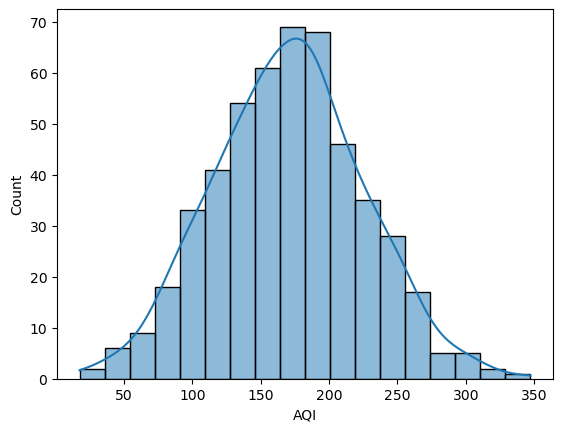

In [18]:
# AQI dist
sns.histplot(df["AQI"], kde=True)
plt.show()

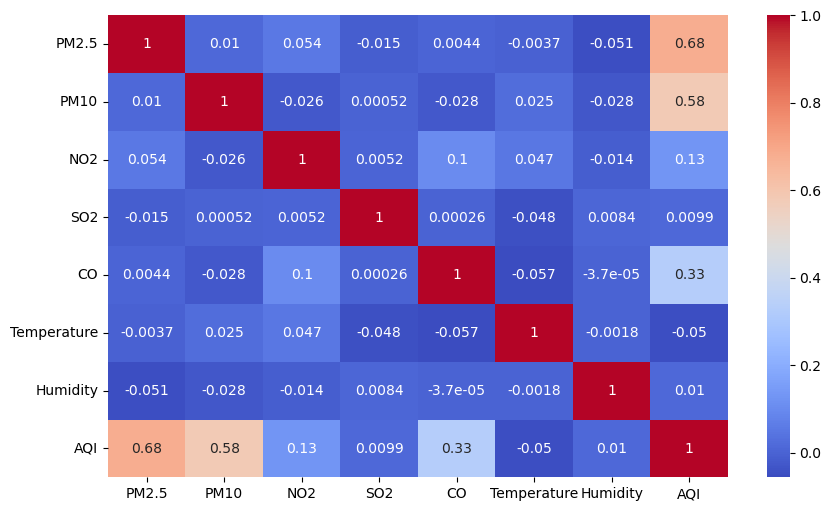

In [19]:
plt.figure(figsize=(10,6))# correlation is between -1 to 1 , 1 means best corelation
sns.heatmap(df.corr(),annot =True,cmap="coolwarm")
plt.show()

In [50]:
x = df[["PM2.5"	,"PM10", "NO2","SO2","CO","Temperature","Humidity"]]
y = df["AQI"]
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [51]:
# lets do the model training 
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
# Lets check training score
from sklearn.metrics import r2_score
train_predict = model.predict(x_train)
score = r2_score(train_predict, y_train)
print(f"r2_score : {score}")

r2_score : 0.9227773609314758


In [53]:
# Prediction on test data
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


In [55]:
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})
coeff_df

,Feature,Coefficient
0,PM2.5,0.515938
1,PM10,0.301457
2,NO2,0.106057
3,SO2,0.057122
4,CO,14.841563
5,Temperature,-0.286245
6,Humidity,0.161027


In [56]:
#model save
import joblib
joblib.dump(model,"LR_AQI_Prediction.joblib")

['LR_AQI_Prediction.joblib']

In [57]:
model = joblib.load("LR_AQI_Prediction.joblib")

In [59]:
new_prediction = model.predict([[251,420,0.02,0.33,0.2,30,70]])
print(new_prediction)

[256.69141233]


/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
